# Solutions

It's time to **plot**.

**2.** The **mean activity** of ions in solution can be measured experimentally. You have been provided with the mean activity of Na$_{2}$SO$_{4}$ at $298\,$K for a range of ionic strengths:

```python
ionic_strength = [0.000, 0.003, 0.006, 0.015, 0.030, 0.060, 0.150, 0.300, 0.600, 1.500, 3.000, 6.000]
mean_activity = [1, 0.886, 0.846, 0.777, 0.712, 0.637, 0.529, 0.446, 0.366, 0.268, 0.204, 0.155]
```

a) Use `matplotlib` to render a scatter plot of the mean activity as a function of the ionic strength $I$.

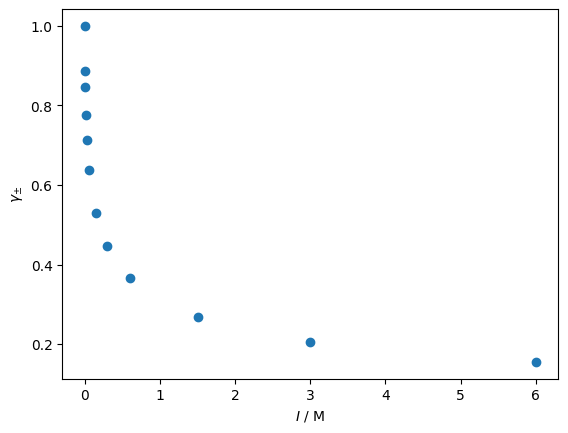

In [1]:
import matplotlib.pyplot as plt
import numpy as np

ionic_strength = np.array([0.000, 0.003, 0.006, 0.015, 0.030, 0.060, 0.150, 0.300, 0.600, 1.500, 3.000, 6.000])
mean_activity = np.array([1, 0.886, 0.846, 0.777, 0.712, 0.637, 0.529, 0.446, 0.366, 0.268, 0.204, 0.155])

plt.plot(ionic_strength, mean_activity, 'o')
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.show()

b) The mean activity can be predicted by the Debye-Huckel limiting law:

$$\ln\gamma_{\pm} = -|z_{+}z_{-}|A\sqrt{I},$$

where $z_{+}$ and $z_{-}$ are the charges of the cations and anions, $I$ is the ionic strength and $A$ is a solvent and temperature dependent constant.

Write a function to calculate the mean activity according to the Debye-Huckel limiting law (feel free to reuse your code from [previous exercises](../lab_4/functions.ipynb)). Using $A = 1.179\,$M$^{\frac{1}{2}}$, plot the Debye-Huckel mean activity from $I = 0\,$M to $I = 6\,$M and compare this with the experimental values.

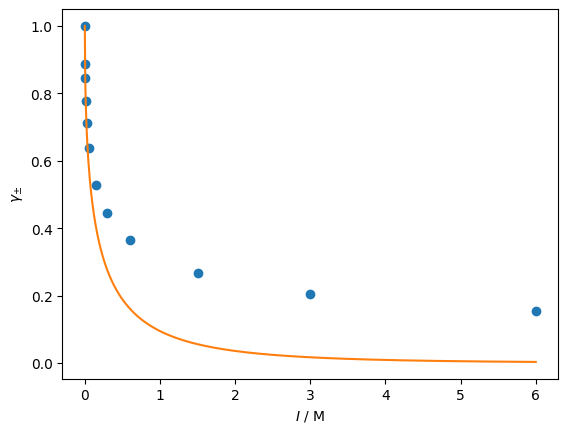

In [2]:
def debye_huckel(I, z_plus, z_minus, A):
    return np.exp(-abs(z_plus * z_minus) * A * np.sqrt(I))

I_dh = np.linspace(0, 6, 1000)
gamma_dh = debye_huckel(I_dh, 1, -2, 1.179)

plt.plot(ionic_strength, mean_activity, 'o')
plt.plot(I_dh, gamma_dh)
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.show()

c) There are several extensions of the Debye-Huckel limiting law that aim to improve its description of the mean activity outside of the dilute limit. One such extension is:

$$\ln\gamma_{\pm} = -|z_{+}z_{-}|\frac{A\sqrt{I}}{1 + Ba_{0}\sqrt{I}},$$

where $B$ is another solvent and temperature dependent constant and $a_{0}$ is the distance of closest approach (expected to be proportional to the closest distance between ions in solution).

Write a function to calculate the mean activity according to the extended Debye-Huckel limiting law. Using $B = 18.3$ and $a_{0} = 0.071$, plot the extended Debye-Huckel mean activity from $I = 0\,$M to $I = 6\,$M and compare this with the experimental values and the original Debye-Huckel limiting law.

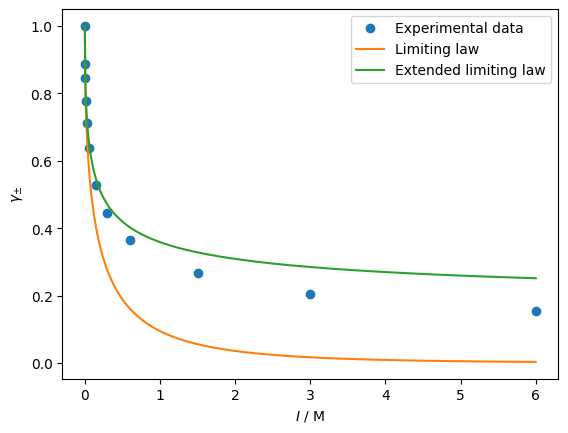

In [3]:
def debye_huckel_extended(I, z_plus, z_minus, A, B, a_0):
    return np.exp(-abs(z_plus * z_minus) * ((A * np.sqrt(I)) / (1 + B * a_0 * np.sqrt(I))))

gamma_dhe = debye_huckel_extended(I_dh, 1, 2, 1.179, 18.3, 0.071)

plt.plot(ionic_strength, mean_activity, 'o', label='Experimental data')
plt.plot(I_dh, gamma_dh, label='Limiting law')
plt.plot(I_dh, gamma_dhe, label='Extended limiting law')
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.legend()
plt.show()

In [359]:
test = '''298.00	5.0000	0.21426	4.6673	42.779	45.113	210.45	89.852	100.71	129.68	0.99598	15.303	0.013172	vapor
298.00	5.1000	0.21883	4.5699	42.772	45.103	210.26	89.878	100.80	129.55	0.99768	15.306	0.013178	vapor
298.00	5.2000	0.22341	4.4761	42.765	45.092	210.08	89.904	100.88	129.41	0.99939	15.309	0.013184	vapor
298.00	5.3000	0.22800	4.3859	42.758	45.082	209.89	89.930	100.97	129.27	1.0011	15.312	0.013190	vapor
298.00	5.4000	0.23261	4.2991	42.751	45.072	209.71	89.957	101.06	129.13	1.0028	15.315	0.013196	vapor
298.00	5.5000	0.23723	4.2154	42.744	45.062	209.54	89.983	101.16	128.99	1.0046	15.319	0.013202	vapor
298.00	5.6000	0.24186	4.1346	42.737	45.052	209.36	90.010	101.25	128.85	1.0063	15.322	0.013209	vapor
298.00	5.7000	0.24651	4.0567	42.729	45.042	209.19	90.037	101.34	128.71	1.0081	15.325	0.013215	vapor
298.00	5.8000	0.25116	3.9815	42.722	45.031	209.02	90.064	101.43	128.56	1.0098	15.328	0.013222	vapor
298.00	5.9000	0.25584	3.9087	42.715	45.021	208.86	90.091	101.53	128.42	1.0116	15.332	0.013228	vapor
298.00	6.0000	0.26052	3.8385	42.708	45.011	208.69	90.118	101.62	128.28	1.0134	15.335	0.013235	vapor
298.00	6.1000	0.26522	3.7705	42.701	45.001	208.53	90.145	101.72	128.14	1.0152	15.338	0.013241	vapor
298.00	6.2000	0.26993	3.7046	42.693	44.990	208.37	90.173	101.82	128.00	1.0170	15.342	0.013248	vapor
298.00	6.3000	0.27466	3.6409	42.686	44.980	208.21	90.201	101.91	127.85	1.0188	15.345	0.013255	vapor
298.00	6.4000	0.27940	3.5791	42.679	44.970	208.05	90.228	102.01	127.71	1.0206	15.349	0.013262	vapor
298.00	6.5000	0.28415	3.5193	42.672	44.959	207.90	90.257	102.11	127.57	1.0224	15.353	0.013269	vapor
298.00	6.6000	0.28892	3.4612	42.664	44.949	207.75	90.285	102.21	127.42	1.0242	15.356	0.013276	vapor
298.00	6.7000	0.29370	3.4049	42.657	44.938	207.60	90.313	102.31	127.28	1.0261	15.360	0.013283	vapor
298.00	6.8000	0.29849	3.3502	42.650	44.928	207.45	90.342	102.41	127.13	1.0280	15.364	0.013290	vapor
298.00	6.9000	0.30330	3.2970	42.642	44.917	207.30	90.370	102.51	126.99	1.0298	15.367	0.013298	vapor
298.00	7.0000	0.30813	3.2454	42.635	44.907	207.16	90.399	102.62	126.84	1.0317	15.371	0.013305	vapor
298.00	7.1000	0.31296	3.1953	42.627	44.896	207.01	90.428	102.72	126.69	1.0336	15.375	0.013313	vapor
298.00	7.2000	0.31782	3.1465	42.620	44.885	206.87	90.457	102.83	126.55	1.0355	15.379	0.013320	vapor
298.00	7.3000	0.32268	3.0990	42.612	44.875	206.73	90.487	102.93	126.40	1.0374	15.383	0.013328	vapor
298.00	7.4000	0.32757	3.0528	42.605	44.864	206.59	90.516	103.04	126.25	1.0393	15.387	0.013336	vapor
298.00	7.5000	0.33246	3.0079	42.597	44.853	206.45	90.546	103.15	126.10	1.0413	15.391	0.013344	vapor
298.00	7.6000	0.33737	2.9641	42.590	44.842	206.32	90.576	103.26	125.96	1.0432	15.395	0.013352	vapor
298.00	7.7000	0.34230	2.9214	42.582	44.832	206.18	90.606	103.36	125.81	1.0452	15.400	0.013360	vapor
298.00	7.8000	0.34724	2.8798	42.575	44.821	206.05	90.636	103.48	125.66	1.0471	15.404	0.013368	vapor
298.00	7.9000	0.35220	2.8393	42.567	44.810	205.92	90.667	103.59	125.51	1.0491	15.408	0.013376	vapor
298.00	8.0000	0.35718	2.7997	42.559	44.799	205.79	90.697	103.70	125.36	1.0511	15.413	0.013385	vapor
298.00	8.1000	0.36217	2.7612	42.552	44.788	205.66	90.728	103.81	125.21	1.0531	15.417	0.013393	vapor
298.00	8.2000	0.36717	2.7235	42.544	44.777	205.53	90.759	103.93	125.06	1.0551	15.421	0.013402	vapor
298.00	8.3000	0.37219	2.6868	42.536	44.766	205.40	90.790	104.04	124.91	1.0571	15.426	0.013410	vapor
298.00	8.4000	0.37723	2.6509	42.529	44.755	205.27	90.822	104.16	124.75	1.0592	15.431	0.013419	vapor
298.00	8.5000	0.38228	2.6159	42.521	44.744	205.15	90.853	104.28	124.60	1.0612	15.435	0.013428	vapor
298.00	8.6000	0.38735	2.5816	42.513	44.733	205.02	90.885	104.40	124.45	1.0633	15.440	0.013437	vapor
298.00	8.7000	0.39244	2.5482	42.505	44.722	204.90	90.917	104.52	124.30	1.0654	15.445	0.013446	vapor
298.00	8.8000	0.39754	2.5155	42.497	44.711	204.78	90.949	104.64	124.14	1.0675	15.449	0.013455	vapor
298.00	8.9000	0.40266	2.4835	42.489	44.700	204.66	90.981	104.76	123.99	1.0696	15.454	0.013464	vapor
298.00	9.0000	0.40780	2.4522	42.481	44.688	204.54	91.014	104.88	123.83	1.0717	15.459	0.013474	vapor
298.00	9.1000	0.41295	2.4216	42.474	44.677	204.42	91.047	105.01	123.68	1.0738	15.464	0.013483	vapor
298.00	9.2000	0.41812	2.3916	42.466	44.666	204.30	91.080	105.14	123.52	1.0759	15.469	0.013493	vapor
298.00	9.3000	0.42331	2.3623	42.458	44.655	204.18	91.113	105.26	123.37	1.0781	15.475	0.013503	vapor
298.00	9.4000	0.42852	2.3336	42.450	44.643	204.06	91.146	105.39	123.21	1.0802	15.480	0.013513	vapor
298.00	9.5000	0.43374	2.3055	42.442	44.632	203.95	91.180	105.52	123.05	1.0824	15.485	0.013523	vapor
298.00	9.6000	0.43898	2.2780	42.434	44.620	203.83	91.213	105.65	122.89	1.0846	15.490	0.013533	vapor
298.00	9.7000	0.44424	2.2510	42.425	44.609	203.72	91.247	105.78	122.74	1.0868	15.496	0.013543	vapor
298.00	9.8000	0.44952	2.2246	42.417	44.597	203.60	91.282	105.92	122.58	1.0890	15.501	0.013554	vapor
298.00	9.9000	0.45482	2.1987	42.409	44.586	203.49	91.316	106.05	122.42	1.0913	15.507	0.013564	vapor
298.00	10.000	0.46013	2.1733	42.401	44.574	203.38	91.351	106.19	122.26	1.0935	15.512	0.013575	vapor
298.00	10.100	0.46547	2.1484	42.393	44.563	203.27	91.386	106.32	122.10	1.0958	15.518	0.013586	vapor
298.00	10.200	0.47082	2.1239	42.384	44.551	203.16	91.421	106.46	121.94	1.0980	15.524	0.013596	vapor
298.00	10.300	0.47619	2.1000	42.376	44.539	203.05	91.456	106.60	121.78	1.1003	15.529	0.013608	vapor
298.00	10.400	0.48158	2.0765	42.368	44.527	202.94	91.492	106.74	121.62	1.1026	15.535	0.013619	vapor
298.00	10.500	0.48700	2.0534	42.360	44.516	202.83	91.528	106.89	121.45	1.1050	15.541	0.013630	vapor
298.00	10.600	0.49243	2.0308	42.351	44.504	202.72	91.564	107.03	121.29	1.1073	15.547	0.013642	vapor
298.00	10.700	0.49788	2.0085	42.343	44.492	202.61	91.600	107.18	121.13	1.1096	15.553	0.013653	vapor
298.00	10.800	0.50335	1.9867	42.334	44.480	202.50	91.636	107.33	120.96	1.1120	15.559	0.013665	vapor
298.00	10.900	0.50884	1.9653	42.326	44.468	202.40	91.673	107.48	120.80	1.1144	15.566	0.013677	vapor
298.00	11.000	0.51435	1.9442	42.317	44.456	202.29	91.710	107.63	120.63	1.1168	15.572	0.013689	vapor
298.00	11.100	0.51988	1.9235	42.309	44.444	202.19	91.748	107.78	120.47	1.1192	15.578	0.013701	vapor
298.00	11.200	0.52543	1.9032	42.300	44.432	202.08	91.785	107.93	120.30	1.1216	15.585	0.013713	vapor
298.00	11.300	0.53101	1.8832	42.292	44.420	201.98	91.823	108.09	120.14	1.1241	15.591	0.013726	vapor
298.00	11.400	0.53660	1.8636	42.283	44.408	201.87	91.861	108.24	119.97	1.1265	15.598	0.013739	vapor
298.00	11.500	0.54222	1.8443	42.275	44.395	201.77	91.899	108.40	119.80	1.1290	15.605	0.013751	vapor
298.00	11.600	0.54786	1.8253	42.266	44.383	201.67	91.938	108.56	119.63	1.1315	15.611	0.013764	vapor
298.00	11.700	0.55352	1.8066	42.257	44.371	201.57	91.977	108.73	119.46	1.1340	15.618	0.013777	vapor
298.00	11.800	0.55920	1.7883	42.248	44.359	201.46	92.016	108.89	119.29	1.1365	15.625	0.013791	vapor
298.00	11.900	0.56490	1.7702	42.240	44.346	201.36	92.055	109.06	119.12	1.1391	15.632	0.013804	vapor
298.00	12.000	0.57063	1.7524	42.231	44.334	201.26	92.095	109.22	118.95	1.1417	15.639	0.013818	vapor
298.00	12.100	0.57638	1.7350	42.222	44.321	201.16	92.135	109.39	118.78	1.1442	15.647	0.013832	vapor
298.00	12.200	0.58215	1.7178	42.213	44.309	201.06	92.175	109.57	118.61	1.1468	15.654	0.013846	vapor
298.00	12.300	0.58795	1.7008	42.204	44.296	200.96	92.215	109.74	118.43	1.1495	15.661	0.013860	vapor
298.00	12.400	0.59377	1.6842	42.195	44.283	200.86	92.256	109.91	118.26	1.1521	15.669	0.013874	vapor
298.00	12.500	0.59962	1.6677	42.186	44.271	200.76	92.297	110.09	118.09	1.1548	15.676	0.013889	vapor
298.00	12.600	0.60548	1.6516	42.177	44.258	200.67	92.339	110.27	117.91	1.1574	15.684	0.013903	vapor
298.00	12.700	0.61138	1.6357	42.168	44.245	200.57	92.380	110.45	117.74	1.1601	15.692	0.013918	vapor
298.00	12.800	0.61730	1.6200	42.159	44.232	200.47	92.422	110.64	117.56	1.1629	15.700	0.013933	vapor
298.00	12.900	0.62324	1.6045	42.150	44.219	200.37	92.465	110.82	117.38	1.1656	15.708	0.013949	vapor
298.00	13.000	0.62921	1.5893	42.140	44.207	200.28	92.507	111.01	117.21	1.1683	15.716	0.013964	vapor
298.00	13.100	0.63520	1.5743	42.131	44.194	200.18	92.550	111.20	117.03	1.1711	15.724	0.013980	vapor
298.00	13.200	0.64122	1.5595	42.122	44.180	200.08	92.593	111.40	116.85	1.1739	15.732	0.013996	vapor
298.00	13.300	0.64727	1.5450	42.113	44.167	199.99	92.637	111.59	116.67	1.1767	15.740	0.014012	vapor
298.00	13.400	0.65334	1.5306	42.103	44.154	199.89	92.681	111.79	116.49	1.1796	15.749	0.014028	vapor
298.00	13.500	0.65944	1.5164	42.094	44.141	199.79	92.725	111.99	116.31	1.1824	15.758	0.014045	vapor
298.00	13.600	0.66556	1.5025	42.084	44.128	199.70	92.769	112.19	116.13	1.1853	15.766	0.014061	vapor
298.00	13.700	0.67172	1.4887	42.075	44.114	199.60	92.814	112.40	115.94	1.1882	15.775	0.014078	vapor
298.00	13.800	0.67790	1.4751	42.065	44.101	199.51	92.860	112.60	115.76	1.1912	15.784	0.014095	vapor
298.00	13.900	0.68411	1.4618	42.056	44.088	199.42	92.905	112.81	115.58	1.1941	15.793	0.014113	vapor
298.00	14.000	0.69035	1.4485	42.046	44.074	199.32	92.951	113.03	115.39	1.1971	15.802	0.014130	vapor
298.00	14.100	0.69661	1.4355	42.036	44.061	199.23	92.997	113.24	115.21	1.2001	15.811	0.014148	vapor
298.00	14.200	0.70291	1.4227	42.027	44.047	199.13	93.044	113.46	115.02	1.2031	15.821	0.014166	vapor
298.00	14.300	0.70924	1.4100	42.017	44.033	199.04	93.091	113.68	114.83	1.2061	15.830	0.014184	vapor
298.00	14.400	0.71559	1.3974	42.007	44.019	198.95	93.138	113.91	114.65	1.2092	15.840	0.014203	vapor
298.00	14.500	0.72198	1.3851	41.997	44.006	198.85	93.186	114.13	114.46	1.2123	15.849	0.014222	vapor
298.00	14.600	0.72839	1.3729	41.987	43.992	198.76	93.234	114.36	114.27	1.2154	15.859	0.014241	vapor
298.00	14.700	0.73484	1.3608	41.977	43.978	198.67	93.283	114.60	114.08	1.2186	15.869	0.014260	vapor
298.00	14.800	0.74132	1.3489	41.967	43.964	198.58	93.332	114.83	113.89	1.2218	15.879	0.014279	vapor
298.00	14.900	0.74783	1.3372	41.957	43.950	198.48	93.381	115.07	113.69	1.2250	15.889	0.014299	vapor
298.00	15.000	0.75437	1.3256	41.947	43.936	198.39	93.431	115.32	113.50	1.2282	15.900	0.014319	vapor
298.00	15.100	0.76095	1.3141	41.937	43.922	198.30	93.481	115.56	113.31	1.2314	15.910	0.014339	vapor
298.00	15.200	0.76756	1.3028	41.927	43.907	198.21	93.532	115.81	113.11	1.2347	15.921	0.014360	vapor
298.00	15.300	0.77420	1.2917	41.917	43.893	198.12	93.582	116.07	112.92	1.2380	15.932	0.014381	vapor
298.00	15.400	0.78088	1.2806	41.906	43.878	198.03	93.634	116.33	112.72	1.2414	15.942	0.014402	vapor
298.00	15.500	0.78759	1.2697	41.896	43.864	197.93	93.686	116.59	112.52	1.2447	15.953	0.014423	vapor
298.00	15.600	0.79434	1.2589	41.886	43.849	197.84	93.738	116.85	112.33	1.2481	15.965	0.014445	vapor
298.00	15.700	0.80112	1.2483	41.875	43.835	197.75	93.791	117.12	112.13	1.2515	15.976	0.014467	vapor
298.00	15.800	0.80794	1.2377	41.865	43.820	197.66	93.844	117.39	111.93	1.2550	15.987	0.014489	vapor
298.00	15.900	0.81479	1.2273	41.854	43.805	197.57	93.898	117.67	111.73	1.2585	15.999	0.014511	vapor
298.00	16.000	0.82169	1.2170	41.843	43.791	197.48	93.952	117.95	111.52	1.2620	16.011	0.014534	vapor
298.00	16.100	0.82862	1.2068	41.833	43.776	197.39	94.007	118.23	111.32	1.2656	16.023	0.014557	vapor
298.00	16.200	0.83558	1.1968	41.822	43.761	197.30	94.062	118.52	111.12	1.2691	16.035	0.014581	vapor
298.00	16.300	0.84259	1.1868	41.811	43.746	197.21	94.117	118.82	110.91	1.2728	16.047	0.014605	vapor
298.00	16.400	0.84964	1.1770	41.800	43.730	197.12	94.173	119.12	110.71	1.2764	16.059	0.014629	vapor
298.00	16.500	0.85672	1.1672	41.789	43.715	197.03	94.230	119.42	110.50	1.2801	16.072	0.014653	vapor
298.00	16.600	0.86385	1.1576	41.778	43.700	196.94	94.287	119.73	110.29	1.2838	16.085	0.014678	vapor
298.00	16.700	0.87102	1.1481	41.767	43.684	196.84	94.345	120.04	110.08	1.2876	16.098	0.014703	vapor
298.00	16.800	0.87823	1.1387	41.756	43.669	196.75	94.403	120.36	109.87	1.2913	16.111	0.014729	vapor
298.00	16.900	0.88548	1.1293	41.745	43.653	196.66	94.462	120.68	109.66	1.2952	16.124	0.014754	vapor
298.00	17.000	0.89278	1.1201	41.733	43.638	196.57	94.522	121.01	109.45	1.2990	16.138	0.014781	vapor
298.00	17.100	0.90012	1.1110	41.722	43.622	196.48	94.582	121.35	109.23	1.3029	16.151	0.014807	vapor
298.00	17.200	0.90750	1.1019	41.711	43.606	196.39	94.642	121.69	109.02	1.3069	16.165	0.014834	vapor
298.00	17.300	0.91493	1.0930	41.699	43.590	196.30	94.703	122.03	108.80	1.3109	16.179	0.014862	vapor
298.00	17.400	0.92241	1.0841	41.688	43.574	196.21	94.765	122.38	108.59	1.3149	16.193	0.014889	vapor
298.00	17.500	0.92993	1.0754	41.676	43.558	196.12	94.827	122.74	108.37	1.3189	16.208	0.014917	vapor
298.00	17.600	0.93750	1.0667	41.664	43.542	196.03	94.890	123.11	108.15	1.3230	16.222	0.014946	vapor
298.00	17.700	0.94512	1.0581	41.653	43.525	195.94	94.954	123.48	107.93	1.3272	16.237	0.014975	vapor
298.00	17.800	0.95278	1.0496	41.641	43.509	195.85	95.018	123.85	107.71	1.3314	16.252	0.015004	vapor
298.00	17.900	0.96050	1.0411	41.629	43.492	195.76	95.083	124.24	107.48	1.3356	16.268	0.015034	vapor
298.00	18.000	0.96827	1.0328	41.617	43.476	195.67	95.149	124.63	107.26	1.3399	16.283	0.015064	vapor
298.00	18.100	0.97609	1.0245	41.605	43.459	195.58	95.216	125.03	107.03	1.3442	16.299	0.015095	vapor
298.00	18.200	0.98397	1.0163	41.592	43.442	195.49	95.283	125.43	106.81	1.3486	16.315	0.015126	vapor
298.00	18.300	0.99190	1.0082	41.580	43.425	195.40	95.351	125.85	106.58	1.3530	16.331	0.015157	vapor
298.00	18.400	0.99988	1.0001	41.568	43.408	195.31	95.419	126.27	106.35	1.3575	16.347	0.015189	vapor
298.00	18.500	1.0079	0.99214	41.555	43.391	195.21	95.489	126.70	106.12	1.3620	16.364	0.015222	vapor
298.00	18.600	1.0160	0.98424	41.543	43.373	195.12	95.559	127.14	105.88	1.3666	16.381	0.015255	vapor
298.00	18.700	1.0242	0.97640	41.530	43.356	195.03	95.630	127.59	105.65	1.3712	16.398	0.015289	vapor
298.00	18.800	1.0324	0.96863	41.517	43.338	194.94	95.702	128.04	105.41	1.3759	16.416	0.015323	vapor
298.00	18.900	1.0407	0.96093	41.505	43.321	194.85	95.775	128.51	105.18	1.3806	16.433	0.015357	vapor
298.00	19.000	1.0490	0.95329	41.492	43.303	194.76	95.849	128.99	104.94	1.3854	16.451	0.015392	vapor
298.00	19.100	1.0574	0.94572	41.479	43.285	194.66	95.923	129.47	104.70	1.3902	16.470	0.015428	vapor
298.00	19.200	1.0659	0.93821	41.466	43.267	194.57	95.999	129.97	104.45	1.3951	16.488	0.015464	vapor
298.00	19.300	1.0744	0.93076	41.452	43.249	194.48	96.075	130.48	104.21	1.4001	16.507	0.015501	vapor
298.00	19.400	1.0830	0.92338	41.439	43.230	194.39	96.153	131.00	103.97	1.4051	16.526	0.015539	vapor
298.00	19.500	1.0916	0.91605	41.426	43.212	194.29	96.231	131.53	103.72	1.4102	16.546	0.015577	vapor
298.00	19.600	1.1004	0.90878	41.412	43.193	194.20	96.311	132.07	103.47	1.4154	16.566	0.015615	vapor
298.00	19.700	1.1092	0.90156	41.399	43.175	194.11	96.391	132.62	103.22	1.4206	16.586	0.015655	vapor
298.00	19.800	1.1181	0.89440	41.385	43.156	194.01	96.473	133.19	102.97	1.4259	16.606	0.015695	vapor
298.00	19.900	1.1270	0.88730	41.371	43.137	193.92	96.556	133.77	102.71	1.4312	16.627	0.015735	vapor
298.00	20.000	1.1360	0.88025	41.357	43.117	193.83	96.640	134.37	102.46	1.4366	16.648	0.015777	vapor
298.00	20.100	1.1452	0.87324	41.343	43.098	193.73	96.726	134.98	102.20	1.4421	16.670	0.015819	vapor
298.00	20.200	1.1543	0.86629	41.329	43.078	193.64	96.813	135.60	101.94	1.4477	16.692	0.015861	vapor
298.00	20.300	1.1636	0.85939	41.314	43.059	193.54	96.901	136.24	101.68	1.4534	16.714	0.015905	vapor
298.00	20.400	1.1730	0.85254	41.300	43.039	193.45	96.990	136.90	101.41	1.4591	16.736	0.015949	vapor
298.00	20.500	1.1824	0.84573	41.285	43.019	193.35	97.082	137.58	101.15	1.4649	16.760	0.015994	vapor
298.00	20.600	1.1919	0.83897	41.270	42.999	193.25	97.174	138.27	100.88	1.4708	16.783	0.016040	vapor
298.00	20.700	1.2016	0.83226	41.255	42.978	193.16	97.268	138.98	100.61	1.4768	16.807	0.016087	vapor
298.00	20.800	1.2113	0.82558	41.240	42.957	193.06	97.364	139.71	100.34	1.4828	16.831	0.016135	vapor
298.00	20.900	1.2211	0.81895	41.225	42.937	192.96	97.462	140.47	100.06	1.4890	16.856	0.016183	vapor
298.00	21.000	1.2310	0.81236	41.210	42.916	192.87	97.562	141.24	99.785	1.4953	16.881	0.016233	vapor
298.00	21.100	1.2410	0.80581	41.194	42.894	192.77	97.663	142.04	99.506	1.5016	16.907	0.016283	vapor
298.00	21.200	1.2511	0.79930	41.178	42.873	192.67	97.767	142.86	99.224	1.5081	16.933	0.016335	vapor
298.00	21.300	1.2613	0.79283	41.163	42.851	192.57	97.873	143.71	98.939	1.5146	16.960	0.016387	vapor
298.00	21.400	1.2716	0.78639	41.147	42.829	192.47	97.981	144.58	98.652	1.5213	16.988	0.016441	vapor
298.00	21.500	1.2821	0.77999	41.130	42.807	192.37	98.091	145.48	98.362	1.5280	17.015	0.016496	vapor
298.00	21.600	1.2926	0.77362	41.114	42.785	192.27	98.204	146.42	98.069	1.5349	17.044	0.016552	vapor
298.00	21.700	1.3033	0.76728	41.097	42.762	192.17	98.320	147.38	97.773	1.5419	17.073	0.016609	vapor
298.00	21.800	1.3141	0.76098	41.081	42.740	192.06	98.439	148.38	97.475	1.5490	17.103	0.016667	vapor
298.00	21.900	1.3250	0.75470	41.064	42.716	191.96	98.562	149.41	97.173	1.5563	17.133	0.016727	vapor
298.00	22.000	1.3361	0.74846	41.046	42.693	191.86	98.687	150.48	96.869	1.5637	17.164	0.016788	vapor
298.00	22.100	1.3473	0.74224	41.029	42.669	191.75	98.817	151.59	96.561	1.5712	17.196	0.016851	vapor
298.00	22.200	1.3586	0.73604	41.011	42.645	191.65	98.950	152.74	96.250	1.5788	17.228	0.016915	vapor
298.00	22.300	1.3701	0.72988	40.994	42.621	191.54	99.088	153.94	95.935	1.5866	17.262	0.016981	vapor
298.00	22.400	1.3817	0.72373	40.975	42.597	191.43	99.230	155.19	95.617	1.5946	17.296	0.017048	vapor
298.00	22.500	1.3935	0.71761	40.957	42.572	191.33	99.378	156.49	95.295	1.6027	17.331	0.017118	vapor
298.00	22.600	1.4055	0.71150	40.938	42.546	191.22	99.531	157.84	94.969	1.6110	17.367	0.017189	vapor
298.00	22.700	1.4176	0.70542	40.919	42.521	191.11	99.690	159.26	94.640	1.6194	17.404	0.017262	vapor
298.00	22.800	1.4299	0.69935	40.900	42.495	191.00	99.856	160.75	94.306	1.6281	17.442	0.017337	vapor
298.00	22.900	1.4424	0.69329	40.881	42.468	190.89	100.03	162.31	93.968	1.6369	17.481	0.017415	vapor
298.00	23.000	1.4551	0.68725	40.861	42.442	190.77	100.21	163.94	93.625	1.6459	17.521	0.017495	vapor'''

In [369]:
p = np.array([float(test.split()[idx]) for idx in range(15, 2530, 14)])
v = np.array([float(test.split()[idx]) for idx in range(17, 2530, 14)])

p *= 10 ** 5 # bar to Pa
v /= 10 ** 3 # l/mol to m3/mol

In [377]:
from scipy.constants import R

def ideal_gas(v, T):
    return 1 / v * R * T

def vdw(v, T, a, b):
    return (R * T) / (v - b) - a / v ** 2

v_vdw = np.linspace(0.00068725, 0.0045699, 1000)
p_vdw = vdw(v_vdw, 298, 0.7857, 8.79e-05)
p_ideal = ideal_gas(v_vdw, 298)

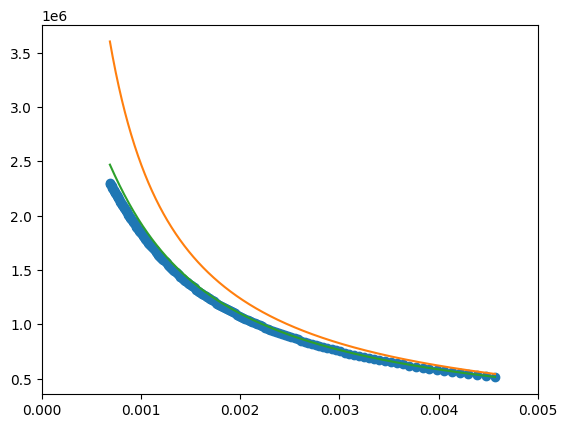

In [378]:
plt.plot(v, p, 'o')
plt.plot(v_vdw, p_ideal)
plt.plot(v_vdw, p_vdw)
plt.xlim(0, 0.005)

plt.show()

In [376]:
min(v)

0.00068725

In [343]:
v[56]

0.0040567

In [344]:
len(v)

200